In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Display basic information about the dataset
display(data.head())
print(data.info())

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


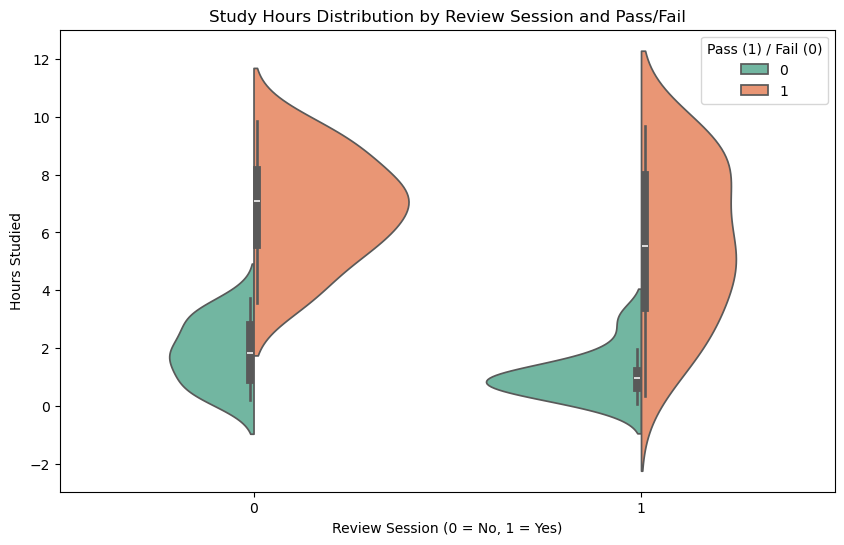

In [12]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Review_Session', y='Hours_Studied', hue='Results', split=True, palette='Set2')
plt.title('Study Hours Distribution by Review Session and Pass/Fail')
plt.xlabel('Review Session (0 = No, 1 = Yes)')
plt.ylabel('Hours Studied')
plt.legend(title='Pass (1) / Fail (0)')
plt.show()

In [14]:
# Logistic Regression Model
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']


In [16]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=200, random_state=42)
model.fit(X, y)


LogisticRegression(max_iter=200, random_state=42, solver='liblinear')

In [18]:
# Model Coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: [-2.77870623]
Coefficients: [[0.92519784 1.10466804]]


In [24]:
# Model Predictions
predictions = model.predict(X)

# Accuracy

accuracy = accuracy_score(y, predictions)
print('Accuracy:', accuracy*100, '%')


Accuracy: 90.0 %


AUC: 0.9738051470588236


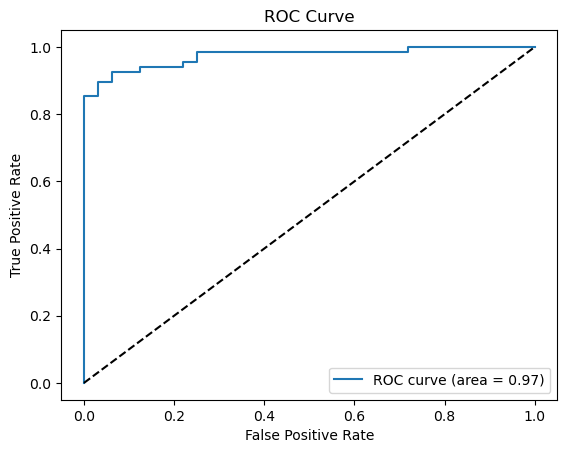

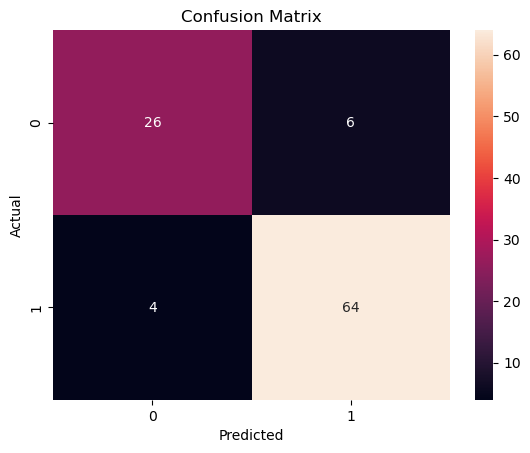

In [26]:
# ROC and AUC
probabilities = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, probabilities)
print('AUC:', auc)

fpr, tpr, _ = roc_curve(y, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
